## Newton's method and the Secant method


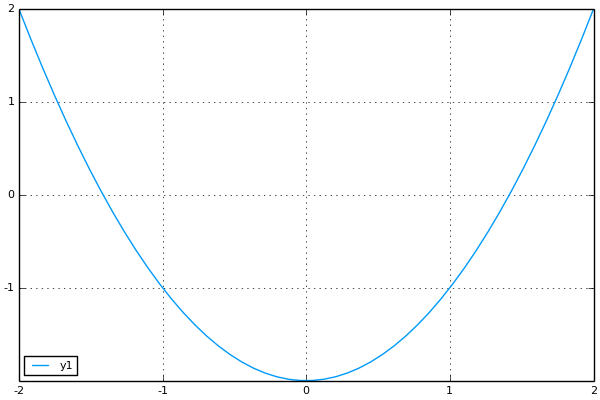

In [15]:
using Plots
f = x -> (x.^2 - 2)
fp = x -> 2x
plot(f, linspace(-2,2,50))

In [19]:
"""
`newton`
=======

Find a point where f(x) = 0 via Newton's method. 

-`x, hist = newton(f,fp,x0,delta,maxit)` 
-`x = newton(f,fp,x0)` uses `delta = sqrt(eps(1.0)), maxit=100`
Runs newton's method starting from x0 where f evaluates
the function f and fp evaluates the derivative of the function
f. This runs for at most maxit iterations until `abs(f(x)) <= delta`
"""
function newton(f, fp, x, delta, maxit)
    hist = zeros(maxit)
    for i=1:maxit
        fpx = fp(x)
        step = f(x)/fpx
        x = x - step
        hist[i] = x
        if abs(f(x)) < delta
            hist = hist[1:i]
            break 
        end
    end
    return x, hist
end
# default options
newton(f, fp, x) = newton(f, fp, x, sqrt(eps(1.0)), 100)

# show example 
newton(f, fp, 1.0)


(1.4142135623746899,[1.5,1.4166666666666667,1.4142156862745099,1.4142135623746899])

In [20]:
"""
`secant`
=======

Find a point where f(x) = 0 via the secant's method. 

-`x, hist = secant(f,x0,delta,maxit)` 
-`x = secant(f,x0)` uses `delta = sqrt(eps(1.0)), maxit=100`
Runs the secant method starting from x0 where f evaluates
the function f and x0 and x1 are two starting vectors that produce
an initial approximation of the derivative. This runs for at 
most maxit iterations until `abs(f(x)) <= delta`
"""
function secant(f, x, delta, maxit)
    hist = zeros(maxit)
    # evaluate initial derivative 
    fpx = (f(x) - f(x - sqrt(eps(1.0))))/(sqrt(eps(1.0)))
    for i=1:maxit
        xold = x
        step = f(x)/fpx
        x = x - step
        fpx = (f(x) - f(xold))/(-step) # could improve 
        hist[i] = x
        if abs(f(x)) < delta 
            hist = hist[1:i]
            break
        end
    end
    return x, hist
end
# default options
secant(f, x) = secant(f, x, sqrt(eps(1.0)), 100)

# show example 
secant(f, 1.0)



(1.4142135620573204,[1.5000000037252903,1.3999999994039536,1.413793103412839,1.4142156862747783,1.4142135620573204])

In [22]:

f1 = x -> x^2
f1p = x -> 2*x
xn,nhist = newton(f1, f1p, 1.0)
xs,shist = secant(f1, 1.0)

display(nhist)
display(shist)


14-element Array{Float64,1}:
 0.5        
 0.25       
 0.125      
 0.0625     
 0.03125    
 0.015625   
 0.0078125  
 0.00390625 
 0.00195313 
 0.000976563
 0.000488281
 0.000244141
 0.00012207 
 6.10352e-5 

19-element Array{Float64,1}:
 0.5        
 0.333333   
 0.2        
 0.125      
 0.0769231  
 0.047619   
 0.0294118  
 0.0181818  
 0.011236   
 0.00694444 
 0.00429185 
 0.00265252 
 0.00163934 
 0.00101317 
 0.000626174
 0.000386997
 0.000239177
 0.00014782 
 9.13576e-5 

In [24]:

f1 = x -> x^3 - x - 3
f1p = x -> 3*x^2 - 1.0
xn,nhist = newton(f1, f1p, 0.0)
xs,shist = secant(f1, 0.0)

display(nhist)
display(shist)


100-element Array{Float64,1}:
 -3.0       
 -1.96154   
 -1.14718   
 -0.00657937
 -3.00039   
 -1.96182   
 -1.14743   
 -0.00725625
 -3.00047   
 -1.96188   
 -1.14749   
 -0.0074025 
 -3.00049   
  ⋮         
 -3.0005    
 -1.9619    
 -1.1475    
 -0.00744608
 -3.0005    
 -1.9619    
 -1.1475    
 -0.00744608
 -3.0005    
 -1.9619    
 -1.1475    
 -0.00744608

16-element Array{Float64,1}:
 -3.0     
  0.375   
  0.848552
 18.9483  
  0.85719 
  0.865796
  3.48848 
  1.08112 
  1.25601 
  1.98873 
  1.57954 
  1.65388 
  1.67288 
  1.67169 
  1.6717  
  1.6717  